# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.metrics import classification_report

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from collections import Counter

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

# **Read Dataset**

In [ ]:
data = pd.read_csv('/content/diabetes.csv')

# **Explore Dataset**

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.duplicated().sum()

np.int64(0)

# **Analysis**

In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

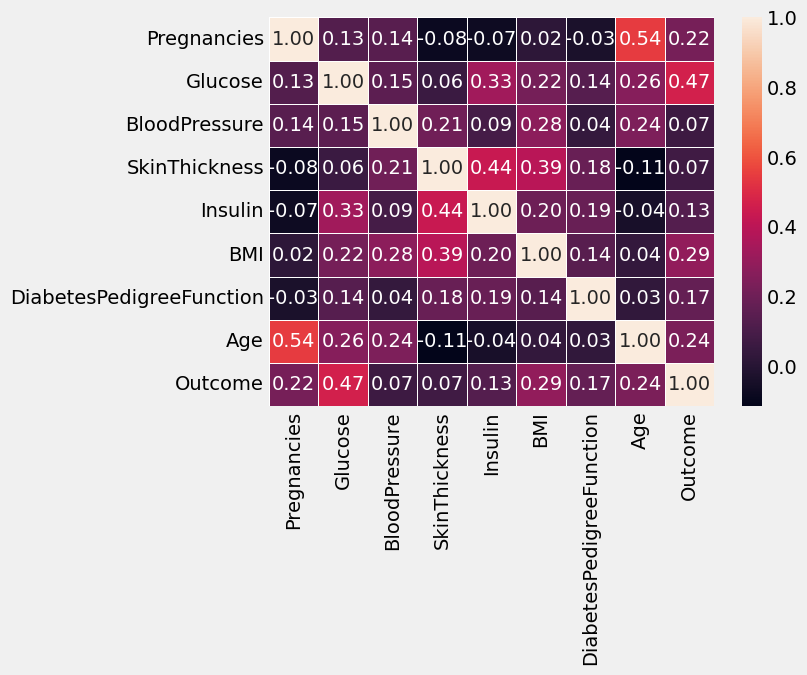

In [ ]:
sns.heatmap(data.corr(),annot = True,fmt = '0.2f', linewidths=0.5)

<Axes: xlabel='Outcome', ylabel='count'>

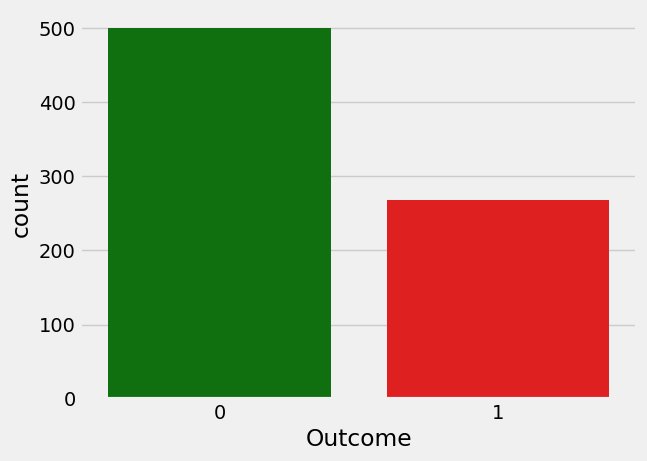

In [ ]:
sns.countplot(x='Outcome', data = data,palette=['g','r'])

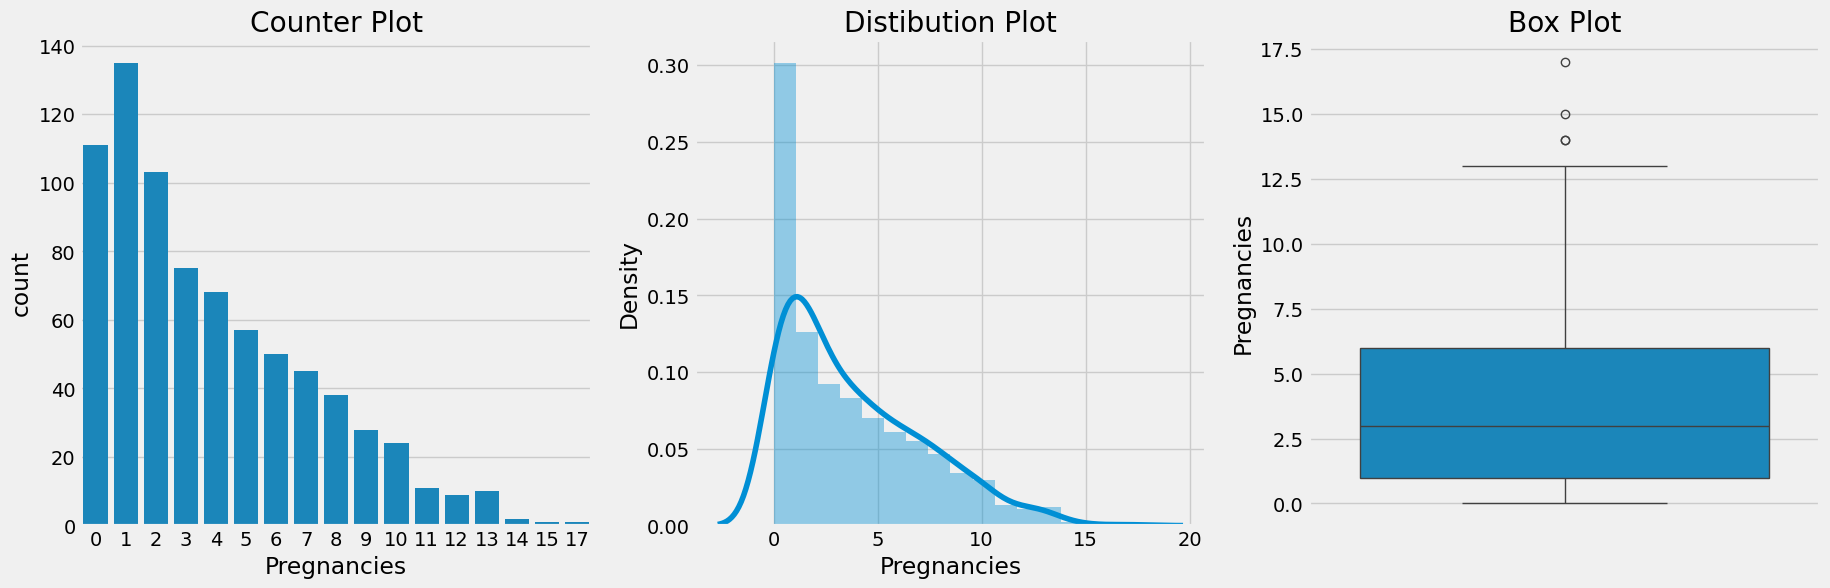

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title("Counter Plot")
sns.countplot(x = 'Pregnancies', data = data)

plt.subplot(1,3,2)
plt.title("Distibution Plot")
sns.distplot(data["Pregnancies"])

plt.subplot(1,3,3)
plt.title("Box Plot")
sns.boxplot(y = data["Pregnancies"])

plt.show()

<Axes: ylabel='Age'>

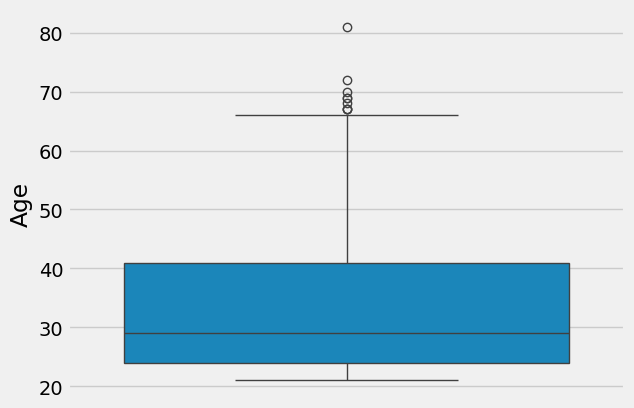

In [ ]:
sns.boxplot(data.Age)

# **Create Model**

In [ ]:
x = data.drop('Outcome',axis = 1)
y = data['Outcome']

In [ ]:
rm = RandomOverSampler(random_state=41)
x_res,y_res = rm.fit_resample(x,y)

In [ ]:
print("Old Dataset Shape {}".format(Counter(y)))
print("New Dataset Shape {}".format(Counter(y_res)))

Old Dataset Shape Counter({0: 500, 1: 268})
New Dataset Shape Counter({1: 500, 0: 500})


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=41)

In [ ]:
model1 = LogisticRegression()
model2 = SVC()
model3 = RandomForestClassifier(n_estimators=100,class_weight='balanced')
model4 = GradientBoostingClassifier(n_estimators=1000)

In [ ]:
columns = ['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
result1 = []
result2 = []
result3 = []

In [ ]:
def cal(model):
  model.fit(x_train,y_train)
  pre = model.predict(x_test)
  accuracy = accuracy_score(pre,y_test)
  recall = recall_score(pre,y_test)
  f1 = f1_score(pre,y_test)

  result1.append(accuracy)
  result2.append(recall)
  result3.append(f1)

  sns.heatmap(confusion_matrix(pre,y_test),annot=True)
  print(model)
  print('Accuracy is : ',accuracy,'Recall is : ',recall,'F1 is : ',f1)


LogisticRegression()
Accuracy is :  0.74 Recall is :  0.78125 F1 is :  0.7425742574257426


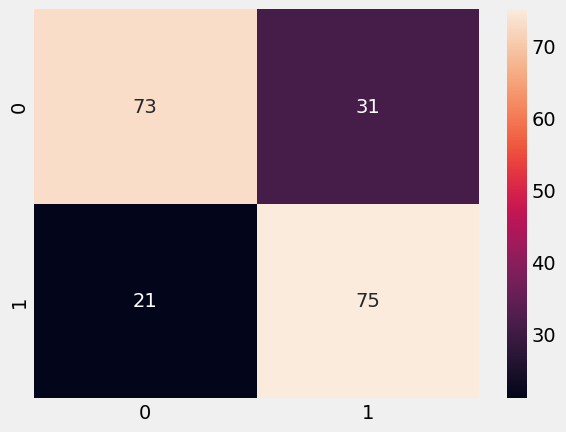

In [ ]:
cal(model1)

SVC()
Accuracy is :  0.69 Recall is :  0.7291666666666666 F1 is :  0.693069306930693


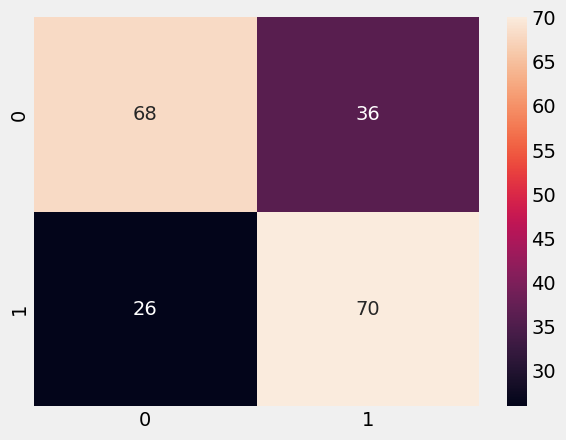

In [ ]:
cal(model2)

RandomForestClassifier(class_weight='balanced')
Accuracy is :  0.855 Recall is :  0.8468468468468469 F1 is :  0.8663594470046083


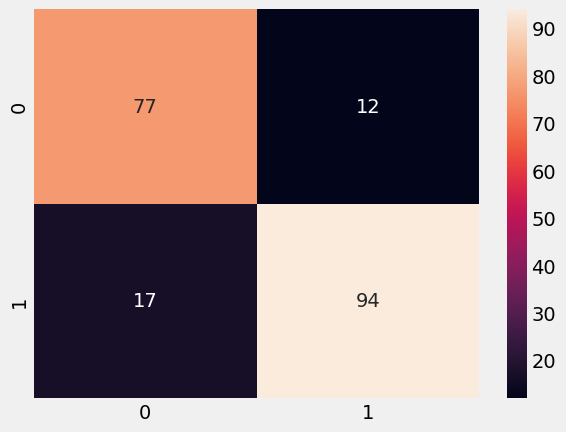

In [ ]:
cal(model3)

GradientBoostingClassifier(n_estimators=1000)
Accuracy is :  0.85 Recall is :  0.8392857142857143 F1 is :  0.8623853211009175


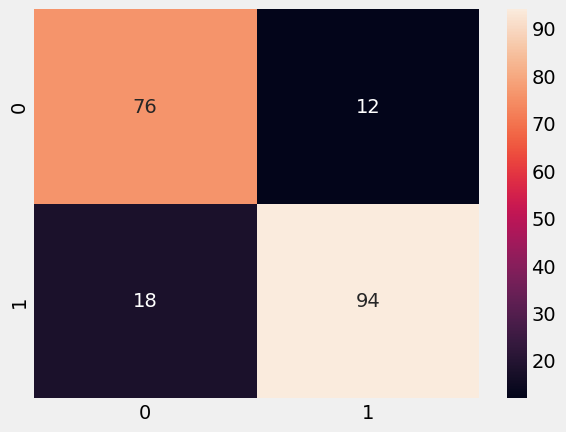

In [ ]:
cal(model4)

In [ ]:
FinalResult = pd.DataFrame({ 'Algorithm' : columns , 'Accuracy' :result1 ,'Recall' : result2 , 'F1_Score' : result3})

In [ ]:
FinalResult

,Algorithm,Accuracy,Recall,F1_Score
0,LogisticRegression,0.740,0.781250,0.742574
1,SVC,0.690,0.729167,0.693069
2,RandomForestClassifier,0.855,0.846847,0.866359
3,GradientBoostingClassifier,0.850,0.839286,0.862385


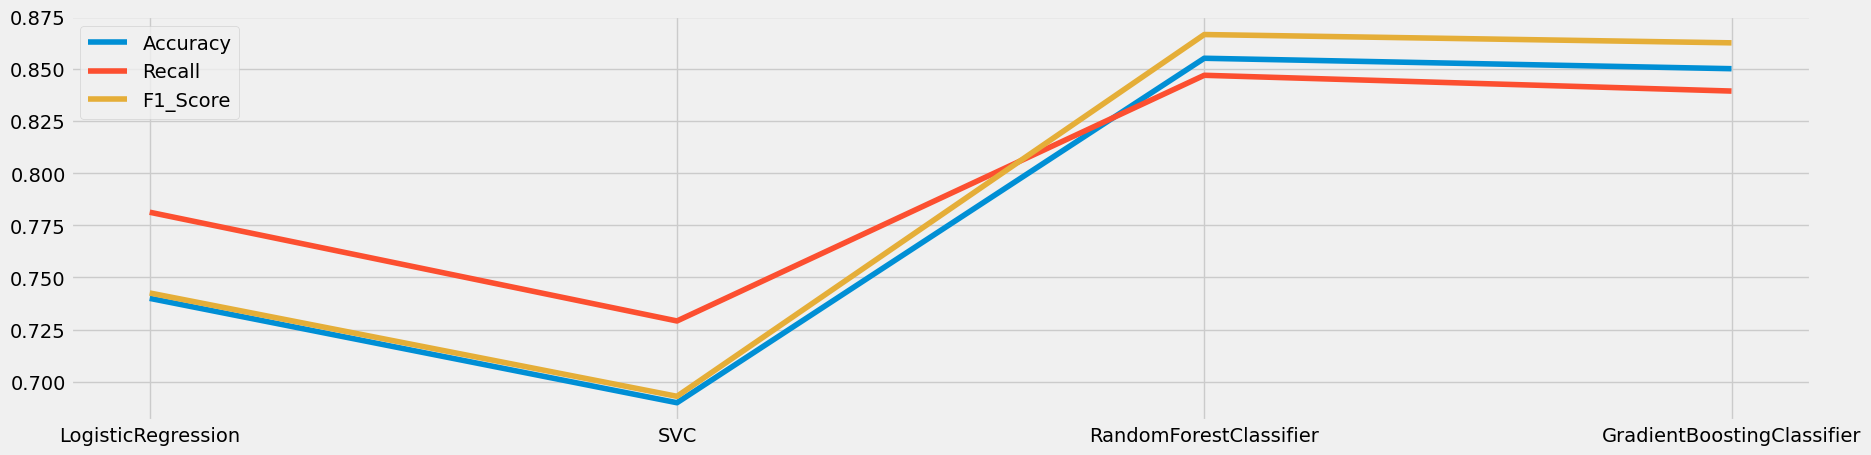

In [ ]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(FinalResult.Algorithm,result1,label='Accuracy')
plt.plot(FinalResult.Algorithm,result2,label='Recall')
plt.plot(FinalResult.Algorithm,result3,label='F1_Score')
plt.legend()
plt.show()

# **Using My Model To Predict New Data**

In [91]:
import pickle

In [92]:
fileName = 'Diabetes_Prediction.sav'
pickle.dump(model3,open(fileName,'wb'))